# 1. StandardScaler

- 개념

    - StandardScaler는 데이터의 평균을 제거하고 분산을 1로 맞추어 표준화합니다.
    - 데이터의 중심을 0으로 하고 표준편차를 1로 맞춥니다.
    - **Outliers(이상치)**에 민감합니다.

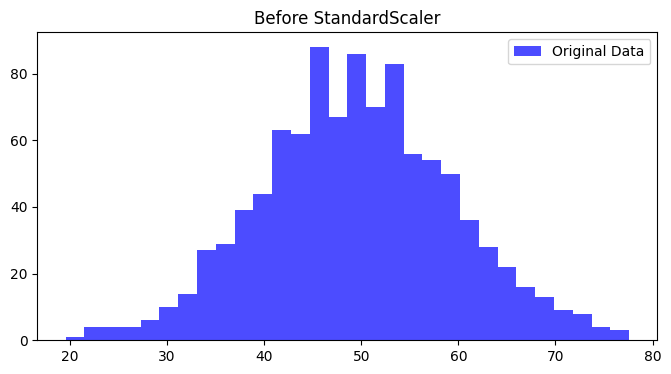

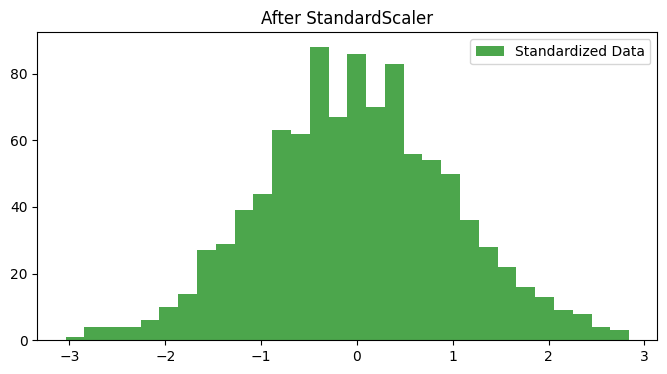

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 예제 데이터 생성
np.random.seed(0)
data = np.random.randn(1000, 1) * 10 + 50  # 평균=50, 표준편차=10

# 스케일링 전
plt.figure(figsize=(8, 4))
plt.hist(data, bins=30, alpha=0.7, color='blue', label='Original Data')
plt.title('Before StandardScaler')
plt.legend()
plt.show()

# StandardScaler 적용
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 스케일링 후
plt.figure(figsize=(8, 4))
plt.hist(scaled_data, bins=30, alpha=0.7, color='green', label='Standardized Data')
plt.title('After StandardScaler')
plt.legend()
plt.show()

- 스케일링 전: 데이터의 중심이 50에 분포하며 표준편차가 10입니다.
- 스케일링 후: 데이터의 중심이 0이고 표준편차가 1입니다.
- 사용 예시: 데이터가 정규 분포를 따를 때 유용합니다.

# 2. MinMaxScaler

- 개념
    - MinMaxScaler는 데이터를 지정된 범위(주로 0과 1)로 스케일링합니다.
    - 원래 데이터의 분포 형태를 유지합니다.
    - Outliers에 민감합니다.


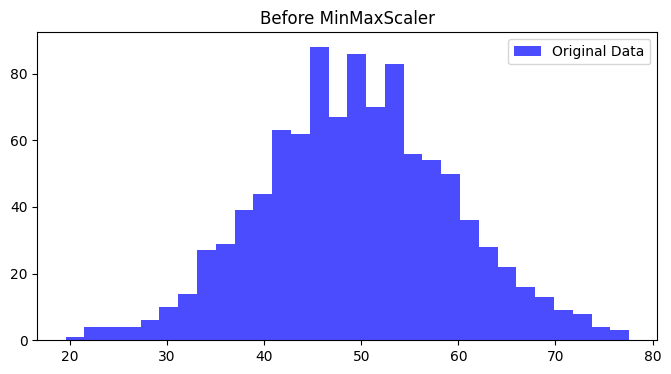

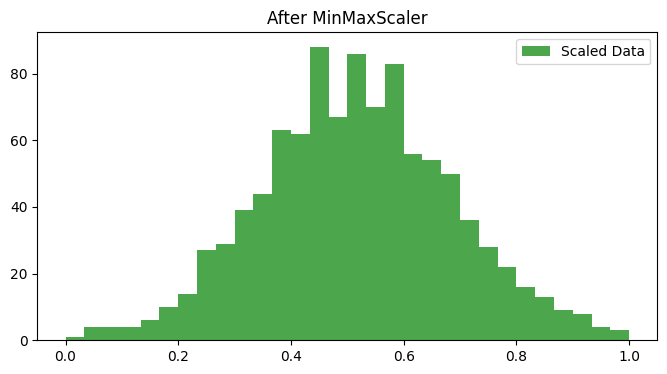

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링 전
plt.figure(figsize=(8, 4))
plt.hist(data, bins=30, alpha=0.7, color='blue', label='Original Data')
plt.title('Before MinMaxScaler')
plt.legend()
plt.show()

# MinMaxScaler 적용
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 스케일링 후
plt.figure(figsize=(8, 4))
plt.hist(scaled_data, bins=30, alpha=0.7, color='green', label='Scaled Data')
plt.title('After MinMaxScaler')
plt.legend()
plt.show()

- 스케일링 후: 데이터 값이 [0, 1] 사이로 조정됩니다.
- 사용 예시: 모든 특징값을 동일한 범위로 맞춰야 할 때 유용합니다.


# 3. RobustScaler

- 개념

    - RobustScaler는 데이터의 중앙값(median)과 IQR을 사용하여 스케일링하므로 Outliers의 영향을 덜 받습니다.
    - 이상치에 강건한 스케일링 방법입니다.

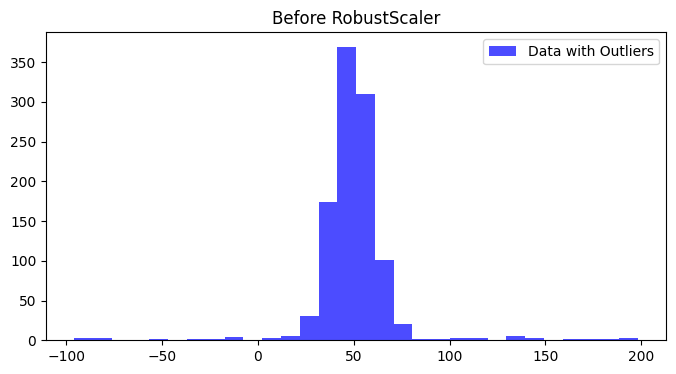

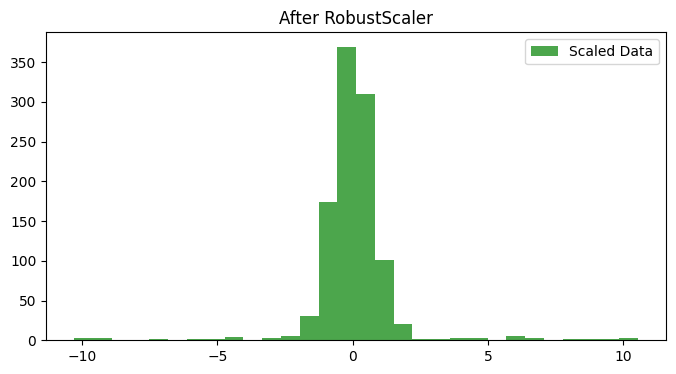

In [ ]:
from sklearn.preprocessing import RobustScaler

# 이상치를 추가한 데이터 생성
outliers = np.random.uniform(low=-100, high=200, size=(50, 1))
data_with_outliers = np.vstack((data, outliers))

# 스케일링 전
plt.figure(figsize=(8, 4))
plt.hist(data_with_outliers, bins=30, alpha=0.7, color='blue', label='Data with Outliers')
plt.title('Before RobustScaler')
plt.legend()
plt.show()

# RobustScaler 적용
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_with_outliers)

# 스케일링 후
plt.figure(figsize=(8, 4))
plt.hist(scaled_data, bins=30, alpha=0.7, color='green', label='Scaled Data')
plt.title('After RobustScaler')
plt.legend()
plt.show()

- 스케일링 후: 데이터의 중앙값과 분포가 이상치에 큰 영향을 받지 않습니다.
- 사용 예시: 데이터에 이상치가 많을 때 적합합니다.

# 4. Normalization

- 개념

    - Normalization은 개별 샘플을 단위 노름(unit norm)을 가지도록 스케일링합니다.
    - 텍스트 분류나 군집화에 자주 사용됩니다.
    - 특징값 스케일링과 혼동하지 않도록 주의합니다.

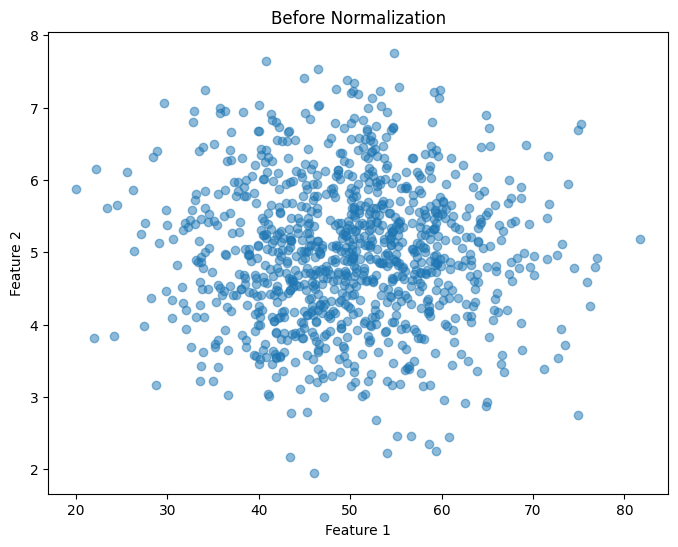

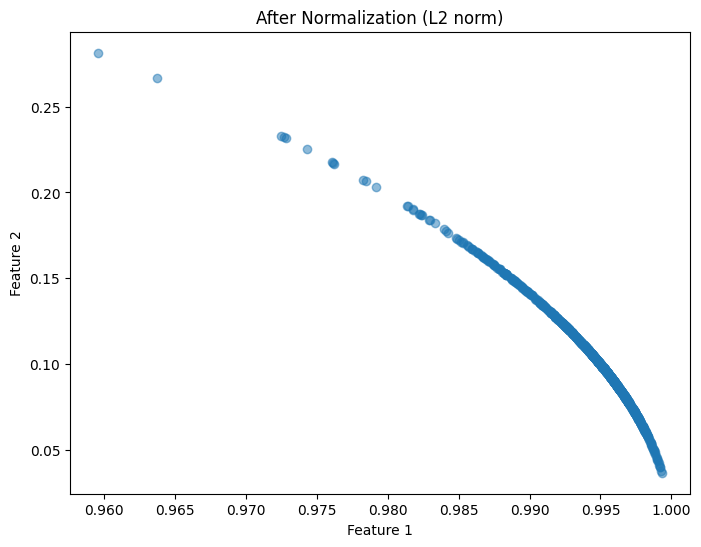

In [ ]:
from sklearn.preprocessing import Normalizer

# 2D 예제 데이터 생성
np.random.seed(0)
data_2d = np.random.randn(1000, 2) * [10, 1] + [50, 5]

# 정규화 전
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.5)
plt.title('Before Normalization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Normalization 적용
normalizer = Normalizer(norm='l2')
normalized_data = normalizer.fit_transform(data_2d)

# 정규화 후
plt.figure(figsize=(8, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], alpha=0.5)
plt.title('After Normalization (L2 norm)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- 정규화 후: 각 샘플의 벡터가 단위 노름을 가집니다.
- 사용 예시: 데이터의 크기보다는 방향이 중요한 경우 사용됩니다.

# 5. Batch Normalization

- 개념

    - Batch Normalization은 신경망의 각 층에 입력되는 값을 정규화하여 학습 속도를 높이고 성능을 향상시킵니다.
    - Internal Covariate Shift를 줄여줍니다.


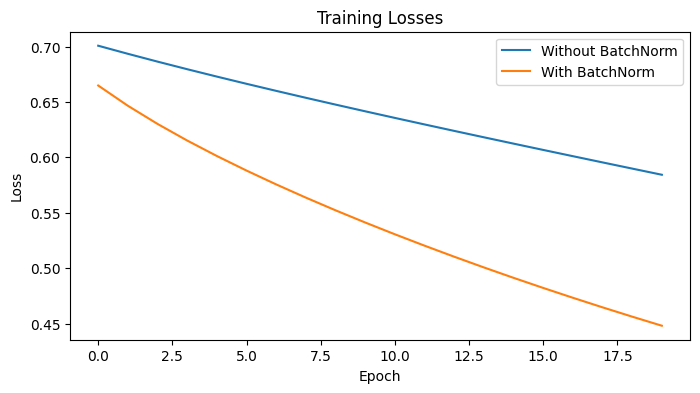

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# BatchNorm을 적용한 신경망 및 미적용 신경망 클래스 정의
class SimpleNN(nn.Module):
    def __init__(self, use_batchnorm=False):
        super(SimpleNN, self).__init__()
        layers = [nn.Linear(10, 50)]
        if use_batchnorm:
            layers.append(nn.BatchNorm1d(50))
        layers.extend([nn.ReLU(), nn.Linear(50, 1)])
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# 예제 데이터 생성
np.random.seed(0)
X = np.random.randn(1000, 10).astype(np.float32)
y = ((X.sum(axis=1) > 0).astype(int)).reshape(-1, 1).astype(np.float32)

# 텐서 변환
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

# 학습 함수 정의
def train_model(use_batchnorm):
    model = SimpleNN(use_batchnorm=use_batchnorm)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    losses = []
    for epoch in range(20):
        optimizer.zero_grad()
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

# 모델 학습
losses_without_bn = train_model(use_batchnorm=False)
losses_with_bn = train_model(use_batchnorm=True)

# 학습 손실 시각화
plt.figure(figsize=(8, 4))
plt.plot(losses_without_bn, label='Without BatchNorm')
plt.plot(losses_with_bn, label='With BatchNorm')
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

- BatchNorm 적용 시: 더 빠른 수렴과 높은 학습 안정성을 보여줍니다.
- 사용 예시: 딥러닝 모델에서 학습 속도와 안정성을 높이기 위해 자주 사용됩니다.

# 6. Regularization

- 개념

    - Regularization은 손실 함수에 패널티 항을 추가하여 모델의 복잡성을 억제함으로써 **Overfitting(과적합)**을 방지합니다.
    - 주로 사용되는 방식은 L1 Regularization(Lasso)과 L2 Regularization(Ridge)입니다.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.134e+02, tolerance: 2.631e-01
  model = cd_fast.enet_coordinate_descent(


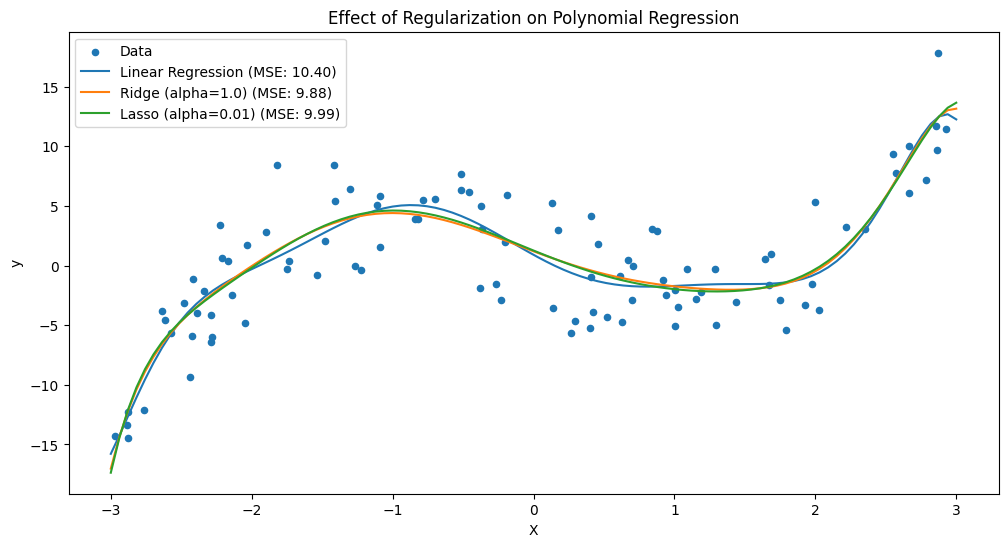

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 예제 데이터 생성
np.random.seed(0)
X = np.random.uniform(-3, 3, size=(100, 1))
y = X**3 - 4*X + np.random.randn(100, 1) * 3

# 다항 특징
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# 모델 정의
models = {
    'Linear Regression': LinearRegression(),
    'Ridge (alpha=1.0)': Ridge(alpha=1.0),
    'Lasso (alpha=0.01)': Lasso(alpha=0.01, max_iter=10000)
}

# 모델 학습 및 결과 시각화
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=20, label='Data')

X_fit = np.linspace(-3, 3, 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_fit = model.predict(X_fit_poly)
    mse = mean_squared_error(y_test, model.predict(X_test))
    plt.plot(X_fit, y_fit, label=f'{name} (MSE: {mse:.2f})')

plt.title('Effect of Regularization on Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

- Regularization 없이: 모델이 과적합되어 노이즈까지 포함한 복잡한 패턴을 학습합니다.
- Ridge/Lasso 적용 시: 모델의 복잡성을 줄여 과적합을 방지하고, 더 나은 일반화 성능을 가집니다.


### 개념 요약

- StandardScaler: 평균과 표준편차를 사용하여 데이터의 중심을 0으로, 분산을 1로 맞춤.

    - 사용 예시: 특징값이 정규 분포를 따를 때.

- MinMaxScaler: 데이터를 특정 범위(주로 [0, 1])로 조정.

    - 사용 예시: 특징값 범위를 동일하게 맞출 때.

- RobustScaler: 중앙값과 IQR을 사용하여 스케일링, 이상치에 덜 민감.

    - 사용 예시: 데이터에 이상치가 많은 경우.

- Normalization: 개별 샘플을 단위 노름으로 조정.

    - 사용 예시: 크기보다 방향이 중요한 경우.

- Batch Normalization: 딥러닝의 각 층에서 입력값을 정규화.

    - 사용 예시: 딥러닝 모델의 학습 속도 및 안정성 향상.

- Regularization: 과적합 방지를 위해 손실 함수에 패널티 항 추가.

    - 사용 예시: 모델이 과적합되는 경우.